# Машинное обучение, ФКН ВШЭ

## Практическое домашнее задание 2. Градиентный спуск своими руками

### Общая информация

Дата выдачи: 30.09.2025

Мягкий дедлайн: 14.10.2025 23:59

Жесткий дедлайн: 18.10.2025 23:59


### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных модификаций градиентного спуска. В файле `descents.py` вам нужно будет реализовать несколько классов для различных вариаций градиентного спуска, а именно:
* `VanillaGradientDescent`
* `StochasticGradientDescent`
* `StochasticAverageGradient`
* `MomentumDescent`
* `Adam`

В файле `linear_regression.py` вам необходимо будет реализовать класс `LinearRegression` для обучения линейной регрессии (и, разумеется, предсказания целевой переменной на основе обученной модели).

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате **homework-practice-02-gd-Username.ipynb**, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10.5

## Задание 1. Реализация градиентного спуска (4 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Напоминание про градиентный спуск

Основное свойство антиградиента &ndash; он указывает в сторону *наискорейшего* убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь $\eta_{k}$ обозначает длину шага на $k$-ой итерации (learning rate), а $Q(w)$ - функцию потерь (loss function).

### Градиент функции потерь MSE

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2025-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается как:

$$
    Q(w) = \frac{1}{\ell} \sum \limits_{i = 1}^\ell (y_i - \langle x_i, w \rangle)^2 = \frac{1}{\ell} \| X w - y \|^2
$$

где $\ell$ – количество объектов в выборке, $X \in \mathbb{R}^{\ell \times d}$ – матрица "объект-признак", а $y \in \mathbb{R}^\ell$ – целевая переменная. Через $x_i$ обозначается $i$-ая строчка матрицы $X$, отвечающая за $i$-й объект выборки.

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

**Решение:**

$2/ℓ X^⊤(Xw-y)$

Из https://github.com/esokolov/ml-course-hse/blob/master/2025-fall/seminars/sem03-vector-diff.pdf

### Задание 1.1. Learning Rate Schedules (0.03 балла)

Обратите внимание на **абстрактный** класс `LearningRateSchedule` в файле `descents.py`. С помощью него мы на каждой итерации градиентного спуска будем получать соответствующий `learning_rate` $\eta_k$.

В файле уже реализован класс `ConstantLR`, который на каждой итерации возвращает один и тот же заранее заданный шаг. Ваша задача в этом пункте – реализовать `TimeDecayLR`, который мы будем использовать для обучения линейной регрессии. Формула очередного шага должна выглядеть следующим образом:
$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

**Обратите внимание**

Все реализуемые вами классы спуска в задании - это *универсальные* оптимизаторы. Они не должны считать градиенты конкретной функции потерь внутри себя.

Для вычисления градиента они всегда обращаются к модели, с которой работают:

```
gradient = self.model.compute_gradients(X_batch, y_batch)
```

Чтобы это работало, уже на данном этапе должны быть реализованы в `linear_regression.py`:

* `compute_gradients(X, y)` для MSE (в дальнейшем, в Задании 7, сюда добавляется член L2-регуляризации),
* `compute_loss(X, y)` для MSE (аналогично с учётом L2 при необходимости).

Если идёте строго по порядку, реализуйте эти MSE-версии в начале Задания 2.1 (используя формулы из п. 1.0), а затем вернитесь к заданиям 1.2–1.6 - код оптимизаторов менять не придётся. В Задании 8 вы просто расширите обе функции под `LogCosh` и `Huber`, переключая их через `self.loss_function`.

Такой подход позволяет свободно менять функцию потерь, не переписывая алгоритмы оптимизации.

In [1]:
%%writefile descents.py
import numpy as np
from abc import ABC, abstractmethod

# ===== Learning Rate Schedules =====
class LearningRateSchedule(ABC):
    @abstractmethod
    def get_lr(self, iteration: int) -> float:
        pass

class ConstantLR(LearningRateSchedule):
    def __init__(self, lr: float):
        self.lr = lr
    def get_lr(self, iteration: int) -> float:
        return self.lr

class TimeDecayLR(LearningRateSchedule):
    def __init__(self, lambda_: float = 1.0):
        self.s0 = 1
        self.p = 0.5
        self.lambda_ = lambda_

    def get_lr(self, iteration: int) -> float:
        return self.lambda_ / ((self.s0 + iteration) ** self.p)

# ===== Base Optimizer =====
class BaseDescent(ABC):
    def __init__(self, lr_schedule: LearningRateSchedule = TimeDecayLR):
        self.lr_schedule = lr_schedule()
        self.iteration = 0
        self.model = None
    def set_model(self, model):
        self.model = model
    @abstractmethod
    def update_weights(self):
        pass
    def step(self):
        self.update_weights()
        self.iteration += 1

# ===== Specific Optimizers =====
class VanillaGradientDescent(BaseDescent):
    def update_weights(self):
        X_train = self.model.X_train
        y_train = self.model.y_train
        gradient = self.model.compute_gradients(X_train, y_train)
        lr = self.lr_schedule.get_lr(self.iteration)
        delta_w = -lr * gradient
        self.model.w += delta_w
        return delta_w


class StochasticGradientDescent(BaseDescent):
    def __init__(self, lr_schedule: LearningRateSchedule = TimeDecayLR, batch_size=1):
        super().__init__(lr_schedule)
        self.batch_size = batch_size

    def update_weights(self):
        n = self.model.X_train.shape[0]
        batch_indices = np.random.choice(n, size=self.batch_size, replace=False)
        X_batch = self.model.X_train[batch_indices]
        y_batch = self.model.y_train[batch_indices]

        gradient = self.model.compute_gradients(X_batch, y_batch)
        lr = self.lr_schedule.get_lr(self.iteration)

        self.model.w -= lr * gradient
        return -lr * gradient

class SAGDescent(BaseDescent):
    def __init__(self, lr_schedule: LearningRateSchedule = TimeDecayLR):
        super().__init__(lr_schedule)
        self.grad_memory = None
        self.avg_grad = None
        self.n_samples = None

    def update_weights(self):
        X = self.model.X_train
        y = self.model.y_train
        n_samples, n_features = X.shape

        if self.grad_memory is None:
            self.grad_memory = np.zeros((n_samples, n_features))
            self.grad_sum = np.zeros(n_features)
        j = np.random.randint(n_samples)
        new_grad = self.model.compute_gradients(X[j:j+1], y[j:j+1])
        delta = new_grad - self.grad_memory[j]
        self.grad_sum += delta
        self.grad_memory[j] = new_grad

        lr = self.lr_schedule.get_lr(self.iteration)
        self.model.w -= lr * (self.grad_sum / n_samples)
        return -lr * (self.grad_sum / n_samples)


class MomentumDescent(BaseDescent):
    def __init__(self, lr_schedule: LearningRateSchedule = TimeDecayLR, beta=0.9):
        super().__init__(lr_schedule)
        self.beta = beta
        self.velocity = None

    def update_weights(self):
        X = self.model.X_train
        y = self.model.y_train
        w = self.model.w
        gradient = self.model.compute_gradients(X, y)
        lr = self.lr_schedule.get_lr(self.iteration)

        if self.velocity is None:
            self.velocity = np.zeros_like(w)

        self.velocity = self.velocity * self.beta + lr * gradient
        self.model.w -= self.velocity
        return -self.velocity

class Adam(BaseDescent):
    def __init__(self, lr_schedule: LearningRateSchedule = TimeDecayLR,
                 beta1=0.9, beta2=0.999, epsilon=1e-8):
        super().__init__(lr_schedule)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update_weights(self):
        X = self.model.X_train
        y = self.model.y_train
        w = self.model.w
        gradient = self.model.compute_gradients(X, y)
        lr = self.lr_schedule.get_lr(self.iteration)

        if self.m is None:
            self.m = np.zeros_like(w)
            self.v = np.zeros_like(w)

        self.t += 1

        self.m = self.m * self.beta1 + (1 - self.beta1) * gradient
        self.v = self.v * self.beta2 + (1 - self.beta2) * (gradient ** 2)

        m_bias = 1 - self.beta1 ** self.t
        v_bias = 1 - self.beta2 ** self.t
        st = (self.m / m_bias) / ((self.v / v_bias)**0.5 + self.epsilon)

        w_diff = -lr * st
        self.model.w += w_diff

        return w_diff

Overwriting descents.py


In [2]:
%load_ext autoreload
%autoreload 2

import descents

### Задание-примечание 1.1. Родительский класс BaseDescent (0 баллов).

В файле `descents.py` приведен шаблон класса `BaseDescent` – родительского класса для модификаций градиентного спуска, от которого будут наследоваться другие классы (`VanillaGradientDescent`, `StochasticGradientDescent`, `MomentumDescent` и `Adam`). Более подробно про наследование классов в Python можно прочитать
* Наследование: https://docs.python.org/3/tutorial/classes.html#inheritance
* Абстрактные классы: https://docs.python.org/3/library/abc.html

В классе `BaseDescent` **все методы уже реализованы**. Цель этого задания – внимательно ознакомиться с тем, как устроен этот класс.

Обратите внимание на атрибут `self.iteration`, отвечающий за номер итерации алгоритма спуска. Как раз с помощью него (и `self.lr_schedule`) мы и будем получать `learning_rate` на соответствующей итерации алгоритма. Функция `update_weights` должна обновлять веса модели `self.model.w`, а также возвращать величину обновления $w_{k + 1} - w_k$

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Напомним, что шаг классического градиентного спуска выглядит следующим образом:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Важно**: Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса модели `model.w`.

### Напоминание про SGD (стохастических градиентный спуск)

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов, обычно называемое **батчом**.

Оценка $\frac{1}{|B|} \sum \limits_{i \in B} \nabla_w q_i(w_k)$ называется **стохастическим градиентом** функции потерь, а получившийся метод называют методом **стохастического градиентного спуска** или просто SGD.

### Задание 1.3. Стохастический градиентный спуск StochasticGradientDescent (0.7 баллов).

Реализуйте стохастический градиентный спуск, заполнив пропуски в классе `StochasticGradientDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться **гиперпараметром** метода и передаваться в конструктор класса `__init__(...)`. Семплировать индексы батча объектов $B$ можно с повторениями (через np.random.randint) - это допустимо и даёт несмещённую оценку градиента. По желанию можно без повторений (np.random.choice(..., replace=False) или через пермутацию по эпохам).

### Напоминание про метод инерции (или метод моментов)

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация (например, в случае **стохастического градиентного спуска**). Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Stochastic Average Gradient (0.45 балла)

Держим память последних индивидуальных градиентов $g_i$ по всем объектам и их среднее $\bar g = \frac{1}{\ell}\sum_i g_i$. На каждом шаге выбираем индекс(ы) $j$ (мини-батч), заново считаем $g_j^{new}(w_k)$, обновляем среднее:
$$
\bar g \leftarrow \bar g + \frac{1}{\ell}\bigl(g_j^{new} - g_j^{old}\bigr),\qquad
w_{k+1} = w_k - \eta_k, \bar g.
$$
Инициализация: $g_i=0 \Rightarrow \bar g=0$.

Так получаем шаг почти как у полного градиента, но считаем градиент лишь на одном (или нескольких) объекте за итерацию.

Реализуйте класс `SAG` в `descents.py` с хранением `grad_memory` и `avg_grad`. Подсказка: чтобы получить пер-объектный градиент, можно вызывать `compute_gradients` на срезе из одного объекта `X[j:j+1]`.


### Задание 1.5 Метод Momentum - MomentumDescent (0.8 баллов).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ являеться гиперпараметром метода, однако в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Напоминание про AdaGrad, RMSprop и Adam

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. Идея проста: мы будем "копить" сумму квадратов градиентов и делить очередной градиент на корень из этой суммы. Таким образом, обновление весов с большими градиентами будет тормозиться, а с маленькими наоборот получать большие шаги. Формула обновлени будет выглядить так:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафиксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций (метод инерции), а также делать адаптивную длину шага по каждому параметру (`RMSProp`). Таким образом, мы получим метод `Adam` с той лишь разницей, что в методе `Adam` дополнительно делается нормировка накопленных градиентов и квадратов градиентов для устранения смещения.

### Задание 1.6. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam, заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Линейная регресия (1 балл)

### Задание 2.1. Решение методом градиентного спуска (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegressionModel**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [3]:
%%writefile linear_regression.py

import numpy as np
from descents import BaseDescent
from dataclasses import dataclass
from enum import auto, Enum
from typing import Dict, Type, Optional

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

class LinearRegression:
    def __init__(
        self,
        optimizer: Optional[BaseDescent | str] = None,
        l2_coef: float = 0.0,
        tolerance: float = 1e-6,
        max_iter: int = 1000,
        loss_function: LossFunction = LossFunction.MSE
    ):
        self.optimizer = optimizer
        if isinstance(optimizer, BaseDescent):
            self.optimizer.set_model(self)
        self.l2_coef = l2_coef
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.loss_function = loss_function
        self.w = None
        self.X_train = None
        self.y_train = None
        self.loss_history = []

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self.w is None:
            raise NotImplementedError("predict function is not implemented")
        return X@self.w

    def compute_gradients(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
      y_pred = self.predict(X)
      if self.loss_function is LossFunction.MSE:
          grad = (2 / X.shape[0]) * (X.T @ (y_pred - y))
      elif self.loss_function is LossFunction.MAE:
          grad = (1 / X.shape[0]) * (X.T @ np.sign(y_pred - y))
      elif self.loss_function is LossFunction.LogCosh:
          grad = (1 / X.shape[0]) * (X.T @ np.tanh(y_pred - y))
      elif self.loss_function is LossFunction.Huber:
          delta = 1.0
          diff = y_pred - y
          mask = np.abs(diff) <= delta
          grad = (1 / X.shape[0]) * (X.T @ np.where(mask, diff, delta * np.sign(diff)))
      else:
          raise NotImplementedError(f"{self.loss_function} gradients are not implemented")

      grad[:-1] += 2 * self.l2_coef * self.w[:-1]
      return grad

    def compute_loss(self, X: np.ndarray, y: np.ndarray) -> float:
      y_pred = self.predict(X)
      diff = y_pred - y
      if self.loss_function is LossFunction.MSE:
        loss = np.mean((diff) ** 2)
      elif self.loss_function is LossFunction.MAE:
        loss = np.mean(np.abs(diff))
      elif self.loss_function is LossFunction.LogCosh:
        loss = np.mean(np.log(np.cosh(diff)))
      elif self.loss_function is LossFunction.Huber:
        delta = 1.0
        mask = np.abs(diff) <= delta
        loss = np.mean(np.where(mask, 0.5 * diff ** 2, delta * (np.abs(diff) - 0.5 * delta)))
      else:
        raise NotImplementedError(f"{self.loss_function} is not implemented")

      if self.l2_coef > 0:
        loss += self.l2_coef * np.sum(self.w[:-1] ** 2)

      return loss

    def fit(self, X: np.ndarray, y: np.ndarray):
        self.X_train, self.y_train = X, y
        n_samples, n_features = X.shape

        if self.optimizer is None or self.optimizer == "SVD":
            I = np.eye(n_features)
            I[-1, -1] = 0
            if self.l2_coef != 0:
                self.w = np.linalg.solve(X.T @ X + self.l2_coef * I, X.T @ y)
            else:
                self.w = np.linalg.solve(X.T @ X, X.T @ y)
            self.loss_history = [self.compute_loss(X, y)]
            return self

        if isinstance(self.optimizer, BaseDescent):
            self.w = np.zeros(n_features)
            self.loss_history = [self.compute_loss(X, y)]

            for i in range(self.max_iter):
                w_prev = self.w.copy()
                self.optimizer.update_weights()

                diff = self.w - w_prev
                diff_sq_norm = np.sum(diff ** 2)

                if np.isnan(diff).any() or diff_sq_norm < self.tolerance or np.isnan(self.w).any():
                    break

                self.loss_history.append(self.compute_loss(X, y))

            return self

        raise NotImplementedError(f"Unknown optimizer type: {self.optimizer}")

Overwriting linear_regression.py


In [4]:
%load_ext autoreload
%autoreload 2

from linear_regression import LinearRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Задание 2.2. Аналитическое решение (0.5 балла)

Но, как мы помним из лекции, помимо решения при помощи градиентного спуска, для ряда функций потерь можно выписать в том числе аналитическое решение. Давайте сперва вспомним, как оно выглядит для MSE. Выведите оптимальную формулу для $w$, держа в памяти формулу MSE, и дополните класс `LinearRegression`

$$\text{MSE} = \| X w - y \|^2$$
$$ w = (X^TX)^-1X^Ty $$

**Вопрос**: Как мы помним, у аналитического решения есть минусы, какие кстати?

**Ответ**: • Обращение матрицы — сложная операция с кубической сложностью от количества признаков. Если в выборке тысячи признаков, то вычисления могут стать слишком трудоёмкими.

• Матрица $ X^TX $ может быть вырожденной или плохо обусловленной. В этом случае обращение либо невозможно, либо может привести к неустойчивым результатам.

Тут мы ничего специально проверять в контесте не будем

In [5]:
!pip install scikit-learn
import numpy as np

num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [6]:
from sklearn.metrics import mean_squared_error as mse
import sklearn

sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = LinearRegression(optimizer=None)
your_linreg.fit(x, y)
print("Your MSE", mse(your_linreg.predict(x), y))

assert abs(mse(your_linreg.predict(x), y) - mse(sklearn_linreg.predict(x), y)) < 1e-12, "Не повезло, попробуйте еще раз"

Sklearn MSE 0.09020714309011063
Your MSE 0.09020714309011063


Давайте сделаем задание немного прикольнее и изменим одну из колонок. Как мы знаем, полная мультиколлинеарность запрещает нам пользоваться аналитическим решением, но `sklearn` по какой-то причине это обходит, хмм

In [7]:
x[:, 3] = x[:, 2] + x[:, 4]

In [8]:
sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = LinearRegression(optimizer=None)
your_linreg.fit(x, y)

print("Your MSE", mse(your_linreg.predict(x), y))

Sklearn MSE 0.09931919618766384
Your MSE 0.09931919618766384


Ваша задача - понять, как можно сделать так, чтобы аналитическое решение работало всегда, вне зависимости от матрицы X. Как оказывается, это можно сделать, если воспользоваться SVD разложением, в нашем случае усеченным, чтобы было проще (это не то же самое, что обычный SVD, у него другие размерности матриц, смотрите ниже). Воспользуйтесь `scipy.sparse.linalg.svds` с числом компонент 4

Выведите формулу для w и снова дополните класс `LinearRegression`

$$\text{X} = \underset{n\times m}{\mathrm{U}} \ \underset{m\times m}{\mathrm{\Sigma}} \ \underset{m\times k}{\mathrm{V^T}}$$
$$ w = $$

In [9]:
sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = LinearRegression(optimizer="SVD")
your_linreg.fit(x, y)
print("Your MSE", mse(your_linreg.predict(x), y))

assert abs(mse(your_linreg.predict(x), y) - mse(sklearn_linreg.predict(x), y)) < 1e-12, "Не повезло, попробуйте еще раз"

Sklearn MSE 0.09931919618766384
Your MSE 0.09931919618766384


## Задание 3. Проверка кода (0 баллов)

Данная секция нужна для того, чтобы убедиться в правильности реализации методов спуска и класса `LinearRegression`. В начале мы сделаем небольшую локальную проверку на "адекватность" и "запускаемость" ваших моделей, после чего уже можно будет делать посылки в Яндекс Контест.

In [10]:
%reload_ext autoreload

In [11]:
#%autoreload 2

from descents import (
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam)

In [12]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

Проверяем код на запускаемость.

In [13]:
descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
]

max_iter = 10
tolerance = 0
num_objects = 100
dimension = 5

for descent_model in descent_models:
    optimizer = descent_model()
    model = LinearRegression(
        optimizer=optimizer,
        tolerance=tolerance,
        max_iter=max_iter,
    )
    model.fit(x, y)
    assert len(model.loss_history) == max_iter + 1, "Loss history failed"
    y_pred = model.predict(x)
    assert y_pred.shape == y.shape, "Prediction shape does not match target variable"

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в Яндекс Контесте (чуть позже скинем ссылку).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: ID 145968635


* **StochasticDescent**: ID 145968486


* **SAGDescent**: ID 145968328


* **MomentumDescent**: ID 145968185


* **Adam**: ID 145967898


* **LinearRegression**: ID 145769703

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [14]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import (
    ConstantLR, TimeDecayLR,
    VanillaGradientDescent, StochasticGradientDescent,
    MomentumDescent, Adam,
)
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/esokolov/ml-course-hse/refs/heads/master/2025-fall/homework-practice/homework-practice-02-gd/autos.csv')

In [16]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

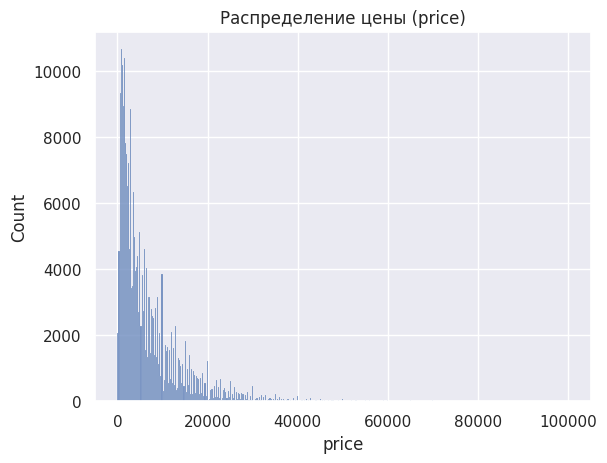

In [17]:
sns.histplot(data['price'])
plt.title('Распределение цены (price)')
plt.show()

<Axes: ylabel='price'>

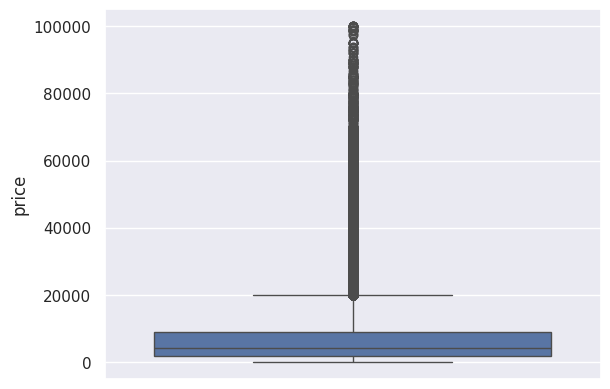

In [18]:
sns.boxplot(data['price'])

Исходное распределение скошено, нужно использовать логарифм

<Axes: xlabel='price_log', ylabel='Count'>

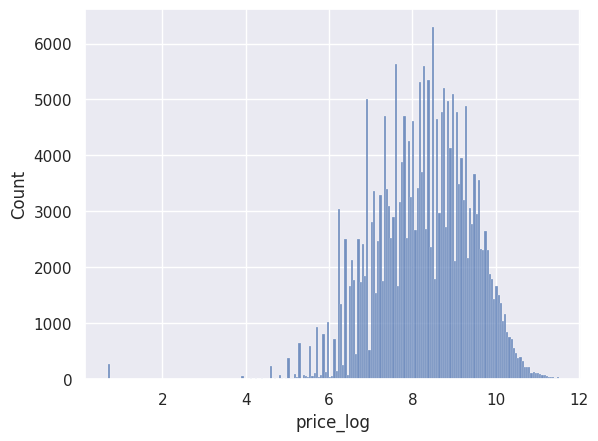

In [19]:
data['price_log'] = np.log1p(data['price'])
sns.histplot(data['price_log'])

<Axes: ylabel='price_log'>

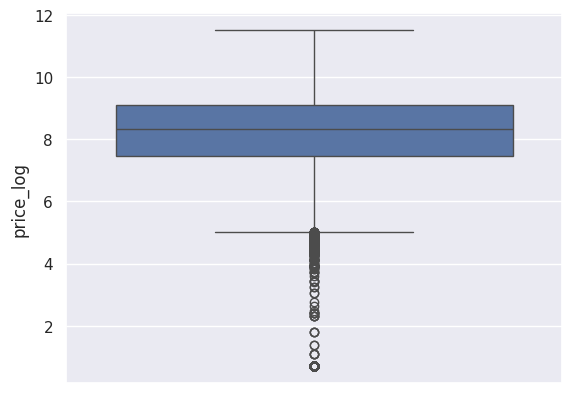

In [20]:
sns.boxplot(data['price_log'])

Видимое улучшение после логарифмирования

Присутствуют выбросы, которые необходимо удалить

In [21]:
Q1 = data['price_log'].quantile(0.25)
Q3 = data['price_log'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data = data[(data['price_log'] >= lower) & (data['price_log'] <= upper)].copy()

<Axes: ylabel='price_log'>

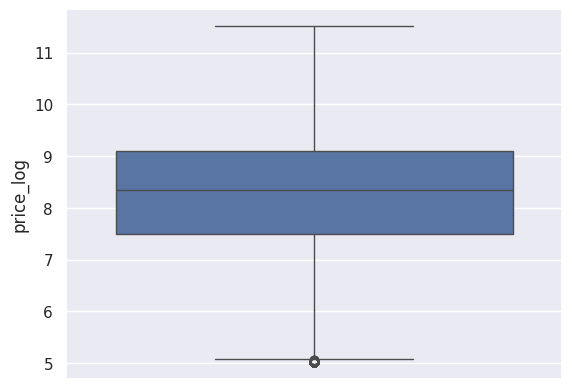

In [22]:
sns.boxplot(data['price_log'])

In [23]:
data.shape

(240399, 11)

In [24]:
data.dtypes

,0
brand,object
model,object
vehicleType,object
gearbox,object
fuelType,object
notRepairedDamage,object
powerPS,int64
kilometer,int64
autoAgeMonths,int64
price,int64


In [25]:
data.isna().sum()

,0
brand,0
model,0
vehicleType,0
gearbox,0
fuelType,0
notRepairedDamage,0
powerPS,0
kilometer,0
autoAgeMonths,0
price,0


Text(0.5, 1.0, 'Корреляция с ценой')

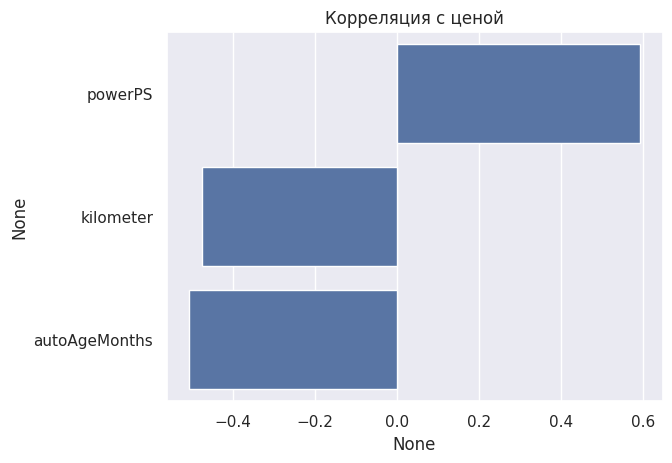

In [26]:
numeric_data = data.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns.drop(['price_log', 'price'])

y = data['price']
X = data.drop('price_log', axis=1)

correlations = X.fillna(numeric_data_mean)[numeric_features].corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.set_title('Корреляция с ценой')

In [27]:
data.select_dtypes(include=[np.number]).corr()

,powerPS,kilometer,autoAgeMonths,price,price_log
powerPS,1.000000,-0.014172,-0.184201,0.591987,0.552079
kilometer,-0.014172,1.000000,0.468917,-0.474169,-0.453114
autoAgeMonths,-0.184201,0.468917,1.000000,-0.506015,-0.642026
price,0.591987,-0.474169,-0.506015,1.000000,0.810970
price_log,0.552079,-0.453114,-0.642026,0.810970,1.000000


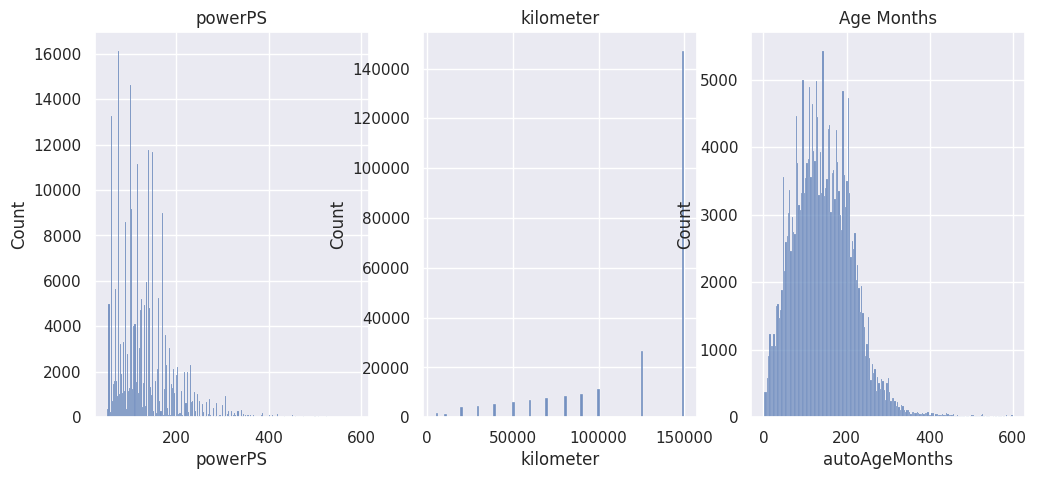

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['powerPS'])
plt.title('powerPS')

plt.subplot(1, 3, 2)
sns.histplot(data['kilometer'])
plt.title('kilometer')

plt.subplot(1, 3, 3)
sns.histplot(data['autoAgeMonths'])
plt.title('Age Months')
plt.show()

Полезные признаки:

autoAgeMonths и PowerPS (kilometer сильно коррелирует с autoAgeMonths (предположительно, чем больше месяцев, тем больше пробег), поэтому принято решение его не учитывать)

Логарифмируем признаки

Text(0.5, 1.0, 'log powerPS')

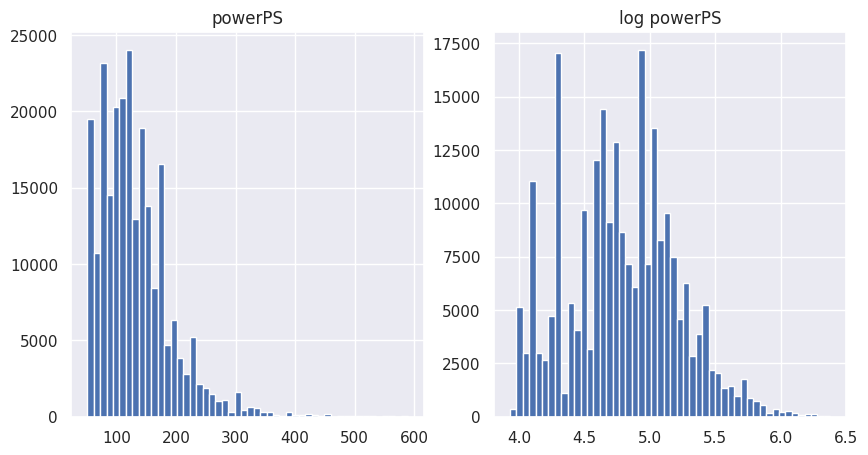

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

data['powerPS'].hist(ax=axes[0], bins=50)
axes[0].set_title('powerPS')

np.log(data['powerPS']).hist(ax=axes[1], bins=50)
axes[1].set_title('log powerPS')

Text(0.5, 1.0, 'age (months)')

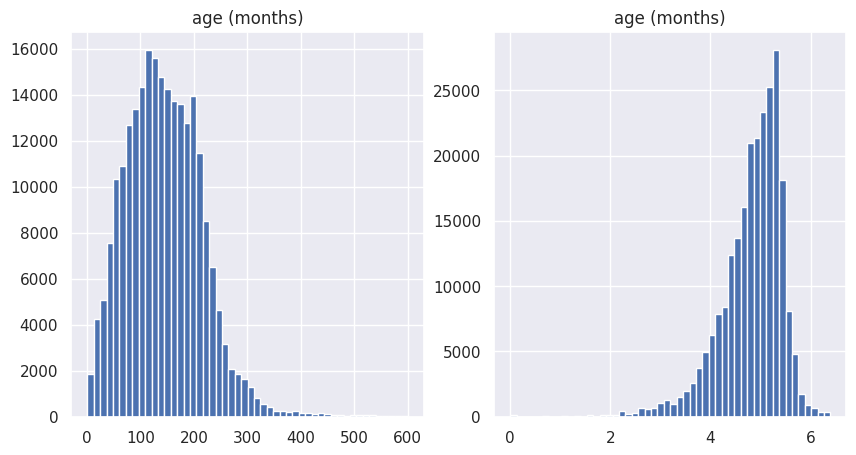

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

data['autoAgeMonths'].hist(ax=axes[0], bins=50)
axes[0].set_title('age (months)')

np.log(data['autoAgeMonths']).hist(ax=axes[1], bins=50)
axes[1].set_title('age (months)')

In [31]:
data['price'] = np.log(data['price'] + 1)
data['autoAgeMonths'] = np.log(data['autoAgeMonths'] + 1)
data['powerPS'] = np.log(data['powerPS'] + 1)

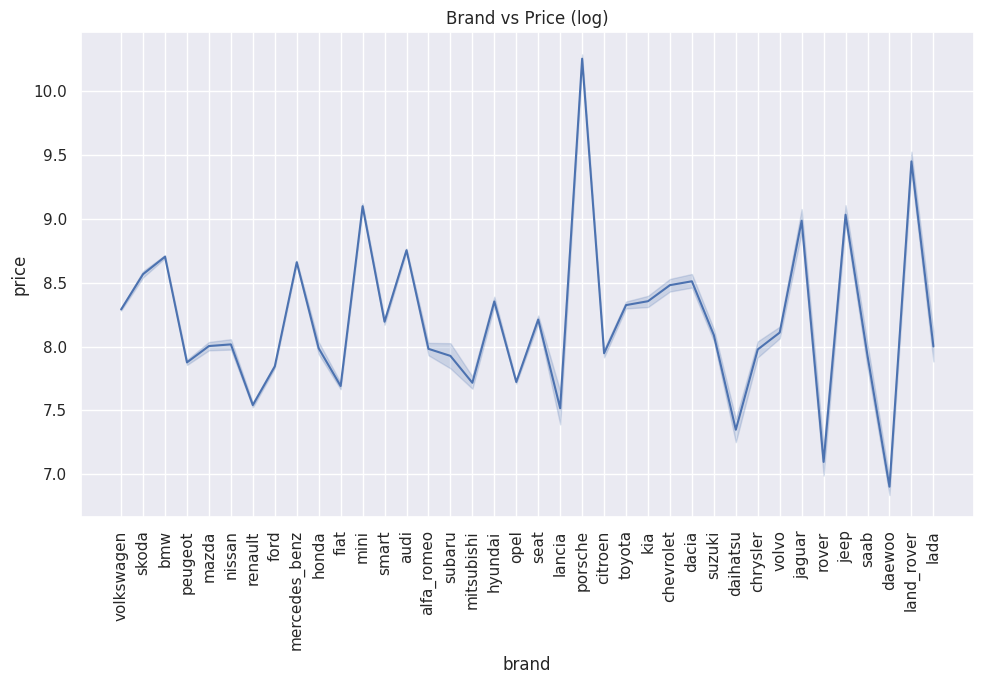

In [32]:
plt.figure(figsize=(10, 7))
sns.lineplot(data, x='brand', y='price')
plt.title('Brand vs Price (log)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

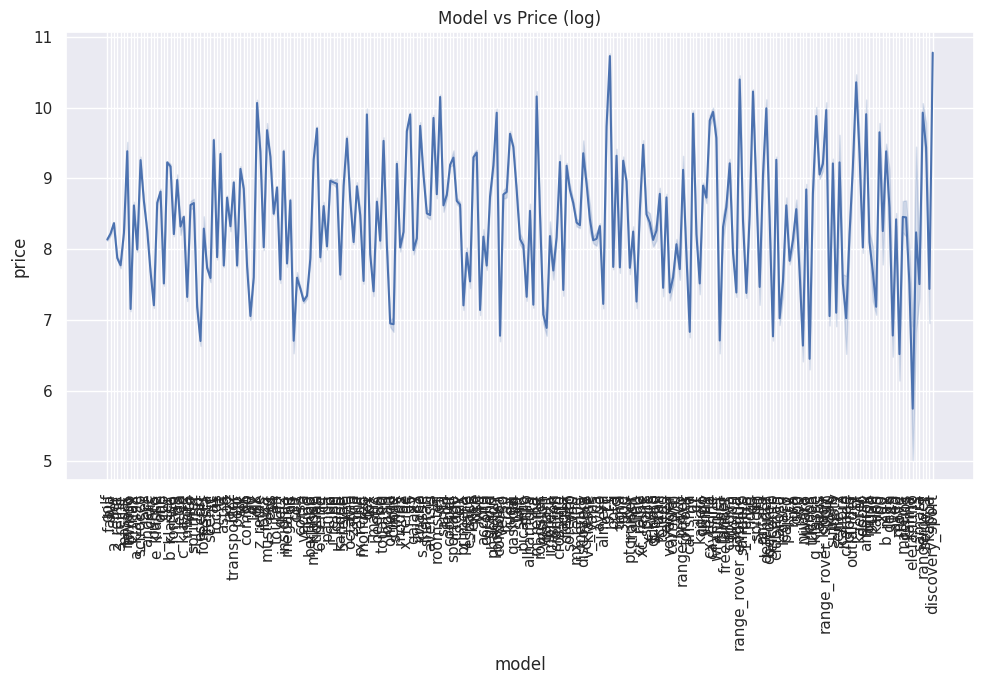

In [33]:
plt.figure(figsize=(10, 7))
sns.lineplot(data, x='model', y='price')
plt.title('Model vs Price (log)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

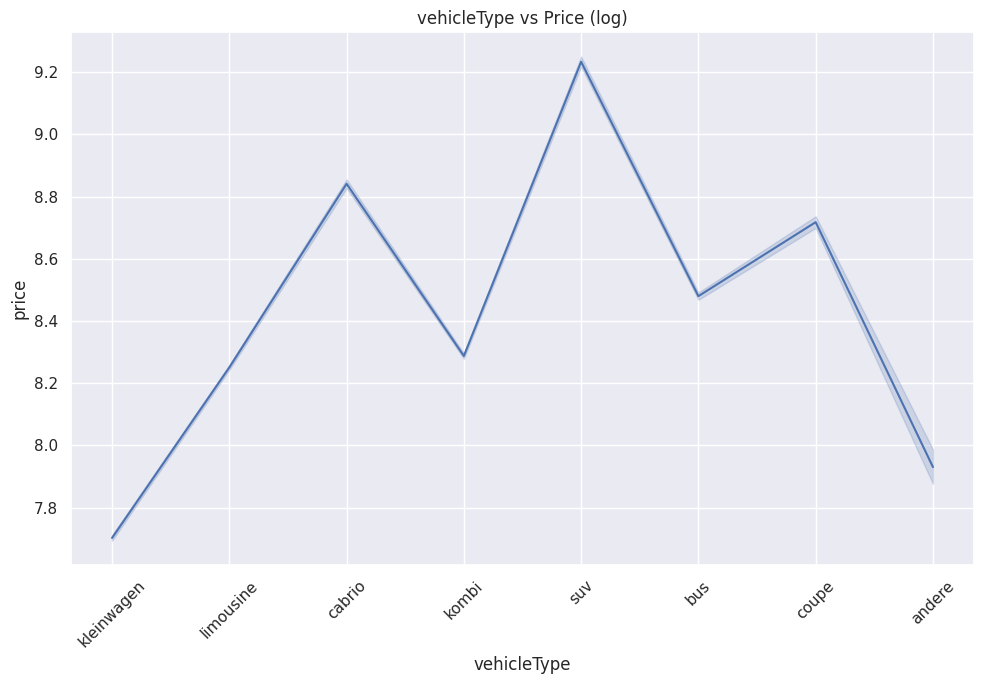

In [34]:
plt.figure(figsize=(10, 7))
sns.lineplot(data, x='vehicleType', y='price')
plt.title('vehicleType vs Price (log)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Признак model имеет слишком много значений, более того, он связан с признаком brand => данный признак не будет использоваться в дальнейшем, в отличие от brand, который важен для анализа (важный категориальный признак -> One-Hot Encoding)
VehicleType тоже полезный признак (важный категориальный признак -> One-Hot Encoding)

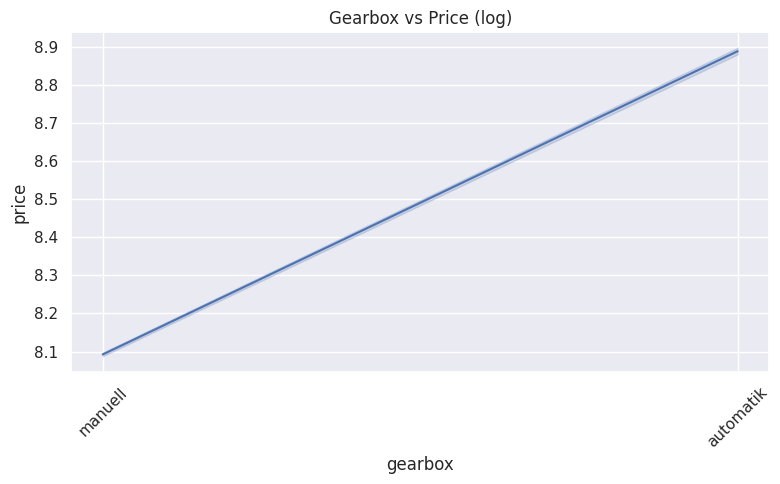

In [35]:
plt.figure(figsize=(8, 5))
sns.lineplot(data, x='gearbox', y='price')
plt.title('Gearbox vs Price (log)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
data['gearbox_binary'] = [1 if i == 'automatik' else 0 for i in data['gearbox']]
data = data.drop('gearbox', axis = 1)

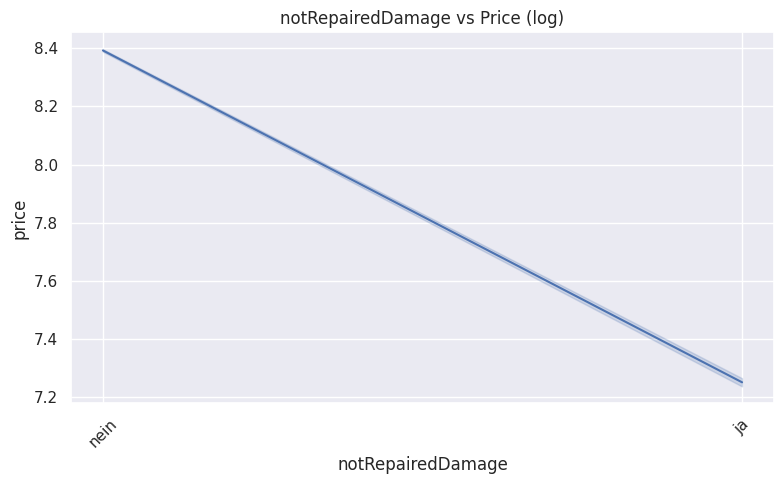

In [37]:
plt.figure(figsize=(8, 5))
sns.lineplot(data, x='notRepairedDamage', y='price')
plt.title('notRepairedDamage vs Price (log)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
data['notRepairedDamage_binary'] = [1 if i == 'nein' else 0 for i in data['notRepairedDamage']]
data = data.drop('notRepairedDamage', axis = 1)

Признаки gearbox и notRepairedDamage полезные, используем бинаризацию данных.

Automatic: 1, manuell: 0

Nein: 0, ia: 0

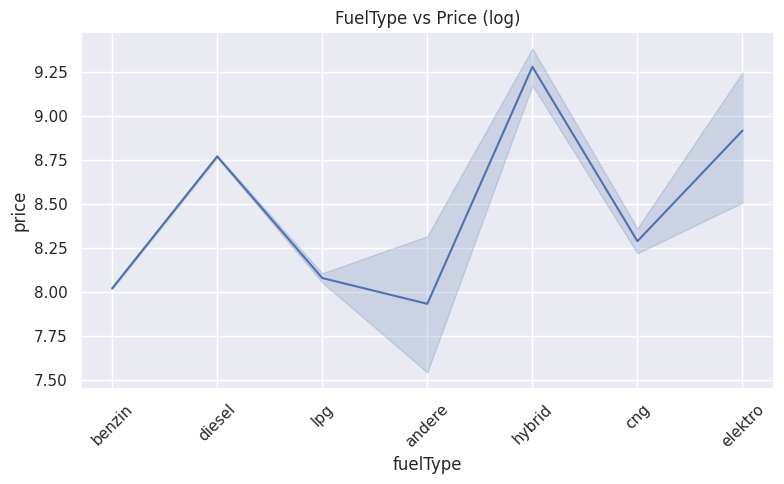

In [39]:
plt.figure(figsize=(8, 5))
sns.lineplot(data, x='fuelType', y='price')
plt.title('FuelType vs Price (log)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Важный категориальный признак -> One-Hot Encoding

Разделите признаки на категориальные, числовые и ... все остальное

In [40]:
data.head(3)

,brand,model,vehicleType,fuelType,powerPS,kilometer,autoAgeMonths,price,price_log,gearbox_binary,notRepairedDamage_binary
0,volkswagen,golf,kleinwagen,benzin,4.330733,150000,5.181784,7.313887,7.313887,0,1
1,skoda,fabia,kleinwagen,diesel,4.248495,90000,4.543295,8.188967,8.188967,0,1
2,bmw,3er,limousine,benzin,4.634729,150000,5.509388,6.478510,6.478510,0,0


In [41]:
data = data.drop(['price_log', 'kilometer', 'model'], axis = 1)

In [42]:
data.head(3)

,brand,vehicleType,fuelType,powerPS,autoAgeMonths,price,gearbox_binary,notRepairedDamage_binary
0,volkswagen,kleinwagen,benzin,4.330733,5.181784,7.313887,0,1
1,skoda,kleinwagen,diesel,4.248495,4.543295,8.188967,0,1
2,bmw,limousine,benzin,4.634729,5.509388,6.478510,0,0


In [43]:
categorical = ['brand', 'vehicleType', 'fuelType']
numeric = ['autoAgeMonths', 'price']
other = ['gearbox_binary', 'notRepairedDamage_binary']


Добавляем в данные единичную колонку `bias`, чтобы не делать отдельные параметр $b$ для свободного члена модели.

In [44]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

А также сделаем базовую обработку данных, а именно:
* Применим `OneHotEncoding` к категориальным признакам
* Стандартизуем численные признаки с помощью `StandardScaler`
* Остальные признаки трогать не будем, т.к. с ними непонятно что делать

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

Теперь вам необходимо разбить данные на обучающую, тестовую и валидационную выборки:

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42)

print(x_train.shape, x_val.shape, x_test.shape)

scaler = StandardScaler(with_mean=False)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


(192319, 58) (24040, 58) (24040, 58)


## Задание 5. Сравнение методов градиентного спуска (1.5 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.75 балла)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [47]:
import numpy as np
from joblib import Parallel, delayed
from sklearn.metrics import r2_score

np.random.seed(42)

methods = {"Vanilla": VanillaGradientDescent,
    "SGD": StochasticGradientDescent,
    "Momentum": MomentumDescent,
    "Adam": Adam,
    "SAG": SAGDescent}

lr_grid = np.logspace(-6, 0, 12)

def evaluate_method(name, OptimizerClass, lr_grid):
    best_lr, best_err = None, float('inf')

    for lr in lr_grid:
        model = LinearRegression(
            optimizer = OptimizerClass(lr_schedule=lambda: ConstantLR(lr)),
            l2_coef=0.0,
            tolerance=1e-4,
            max_iter=1000)
        model.fit(x_train, y_train)
        val_mse = np.mean((model.predict(x_val) - y_val) ** 2)
        if val_mse < best_err:
            best_err, best_lr = val_mse, lr

    return name, best_lr, best_err

results = Parallel(n_jobs=-1, random_state=42)(delayed(evaluate_method)(name, OptimizerClass, lr_grid)
    for name, OptimizerClass in methods.items())

best_lambdas = {n: lr for n, lr, _ in results}
val_errors = {n: err for n, _, err in results}

for n in methods:
    print(f"{n}: best lr={best_lambdas[n]:.1e}, val MSE={val_errors[n]:.4f}")

Vanilla: best lr=2.3e-02, val MSE=19.5902
SGD: best lr=6.6e-03, val MSE=29.7906
Momentum: best lr=2.3e-02, val MSE=16.3357
Adam: best lr=2.8e-01, val MSE=23.0490
SAG: best lr=1.0e+00, val MSE=69.8766


In [48]:
final_results = []
loss_histories = {}

for name, OptimizerClass in methods.items():
    lr = best_lambdas[name]
    model = LinearRegression(
        optimizer = OptimizerClass(lr_schedule=lambda: ConstantLR(lr)),
        l2_coef=0.0,
        tolerance=1e-4,
        max_iter=1000)
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    final_results.append({
        "method": name,
        "lr": lr,
        "train_MSE": np.mean((y_train_pred - y_train) ** 2),
        "test_MSE": np.mean((y_test_pred - y_test) ** 2),
        "r2": r2_score(y_test, y_test_pred),
        "iterations": len(model.loss_history)})

    loss_histories[name] = model.loss_history

In [49]:
final_results_df = pd.DataFrame(final_results)
final_results_df = final_results_df.sort_values(by='method')
print(final_results_df)

     method        lr   train_MSE    test_MSE          r2  iterations
3      Adam  0.284804    0.000736    0.000774    0.999376          98
2  Momentum  0.023101    0.017614    0.017639    0.985764          79
4       SAG  1.000000   69.791694   69.934513  -55.441647           1
1       SGD  0.006579  156.079604  127.379544 -101.803481          64
0   Vanilla  0.023101    0.197672    0.199411    0.839063         104


### Задание 5.2. Сравнение методов (0.75 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

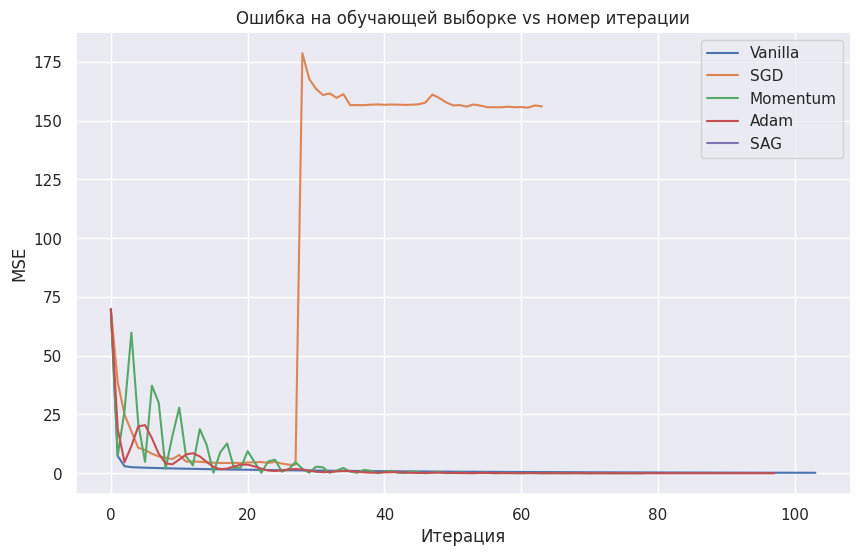

In [50]:
plt.figure(figsize=(10, 6))

for name, history in loss_histories.items():
    plt.plot(range(len(history)), history, label=name)

plt.title("Ошибка на обучающей выборке vs номер итерации")
plt.xlabel("Итерация")
plt.ylabel("MSE")
plt.legend()
plt.show()

Adam и Momentum показали отличное качество (MSE < 0.02, R² > 0.98) с быстрой сходимостью.
Vanilla дал удовлетворительный результат (MSE ≈ 0.2, R² ≈ 0.84), требует больше итераций, меньшая точность.
SGD (нужен меньший шаг) и SAG (нужна другая сетка) показали низкое качество с огромными ошибками (MSE > 60, R² < -50).

momentum — лучший выбор для данной задачи

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, $k = 10$) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [51]:
from joblib import Parallel, delayed
import numpy as np
import time

batch_sizes = [1, 32, 64, 128, 256, 512, 1024]
k = 10
max_iter = 1000
tolerance = 1e-6

def run_experiment(batch_size):
    np.random.seed(42)
    optimizer = StochasticGradientDescent(
        lr_schedule=lambda: ConstantLR(1e-3),
        batch_size=batch_size)
    model = LinearRegression(
        optimizer=optimizer,
        l2_coef=0.0,
        tolerance=tolerance,
        max_iter=max_iter)

    start = time.perf_counter()
    model.fit(x_train, y_train)
    elapsed = time.perf_counter() - start

    return len(model.loss_history), elapsed


results = []
for batch_size in batch_sizes:
    runs = Parallel(n_jobs=-1)(delayed(run_experiment)(batch_size) for _ in range(k))
    iters, times = zip(*runs)

    results.append({
        "batch_size": batch_size,
        "avg_iterations": np.mean(iters),
        "avg_time_sec": np.mean(times)})

    print(f'Batch {batch_size:4d}: avg_iter={np.mean(iters):.1f}, avg_time={np.mean(times):.2f}s')

Batch    1: avg_iter=82.0, avg_time=1.89s
Batch   32: avg_iter=883.0, avg_time=16.38s
Batch   64: avg_iter=1001.0, avg_time=21.43s
Batch  128: avg_iter=1001.0, avg_time=18.50s
Batch  256: avg_iter=906.0, avg_time=21.71s
Batch  512: avg_iter=877.0, avg_time=15.83s
Batch 1024: avg_iter=845.0, avg_time=14.57s


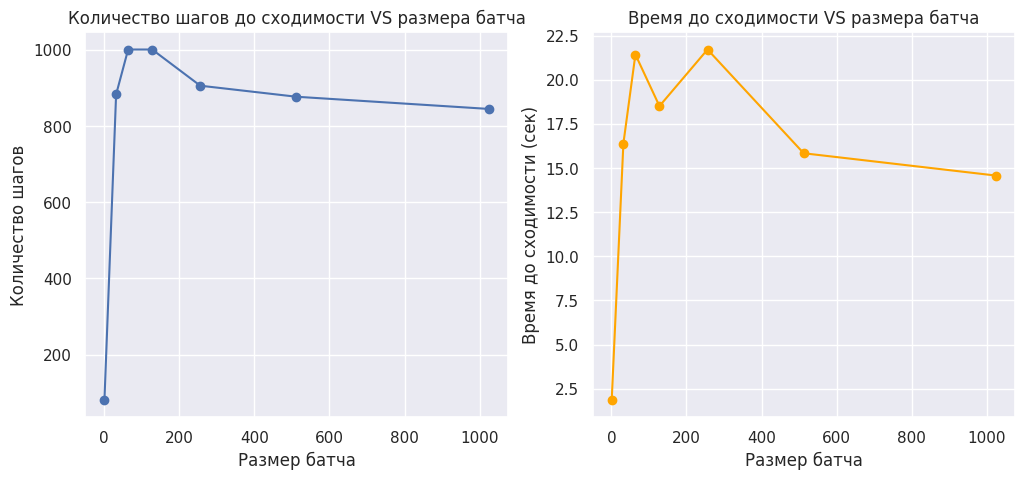

In [52]:
batch_sizes = [r['batch_size'] for r in results]
avg_iterations = [r['avg_iterations'] for r in results]
avg_times = [r['avg_time_sec'] for r in results]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(batch_sizes, avg_iterations, marker='o')
plt.title("Количество шагов до сходимости VS размера батча")
plt.xlabel("Размер батча")
plt.ylabel("Количество шагов")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(batch_sizes, avg_times, marker='o', color='orange')
plt.title("Время до сходимости VS размера батча")
plt.xlabel("Размер батча")
plt.ylabel("Время до сходимости (сек)")
plt.grid(True)

**Выводы:**

При размере батча 1 алгоритм обеспечивает быстрый старт обучения.

С увеличением размера батча количество итераций до сходимости сначала растёт, а затем стабилизируется, при этом общее время обучения остаётся примерно одинаковым (≈10-11 секунд).

Начиная с batch около 50, дальнейшее увеличение размера батча не улучшает скорость или стабильность обучения.

По мере того как веса модели приближаются к локальному или глобальному минимуму, алгоритму требуется все меньше итераций для достижения сходимости на каждом новом батче данных.

## Задание 7. Регуляризация (0.5 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация – это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать $L_2$-регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 5 графиков).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

np.random.seed(42)

methods = {
    "Vanilla": VanillaGradientDescent,
    "SGD": StochasticGradientDescent,
    "Momentum": MomentumDescent,
    "Adam": Adam,
    "SAG": SAGDescent}

lr_grids = {
    "Adam": np.logspace(-5, -1, 9),
    "Momentum": np.logspace(-5, -1, 9),
    "Vanilla": np.logspace(-5, -2, 8),
    "SGD": np.logspace(-6, -4, 7),
    "SAG": np.logspace(-6, -4, 7)}

mu_grid = np.logspace(-6, -1, 8)

def evaluate_method(name, OptimizerClass, lr_grid, mu_grid, use_regularization):
    best_lr, best_mu, best_err = None, None, float('inf')
    best_history = None

    for lr in lr_grid:
        for mu in (mu_grid if use_regularization else [0.0]):
            model = LinearRegression(
                optimizer=OptimizerClass(lr_schedule=lambda: ConstantLR(lr)),
                l2_coef=mu,
                tolerance=1e-4,
                max_iter=1000)
            model.fit(x_train, y_train)
            val_mse = mean_squared_error(y_val, model.predict(x_val))

            if val_mse < best_err:
                best_err, best_lr, best_mu = val_mse, lr, mu
                best_history = model.loss_history.copy()

    return name, best_lr, best_err, best_mu, best_history


results_no_reg = Parallel(n_jobs=-1)(
    delayed(evaluate_method)(name, OptimizerClass, lr_grids[name], mu_grid, False)
    for name, OptimizerClass in methods.items())

results_reg = Parallel(n_jobs=-1)(
    delayed(evaluate_method)(name, OptimizerClass, lr_grids[name], mu_grid, True)
    for name, OptimizerClass in methods.items())

best_lrs_no_reg = {n: lr for n, lr, _, _, _ in results_no_reg}
best_lrs_reg = {n: lr for n, lr, _, _, _ in results_reg}
best_mus_reg = {n: mu for n, _, _, mu, _ in results_reg}
best_histories = {n: hist for n, _, _, _, hist in results_reg}

def run_final_eval(name, OptimizerClass, lr, mu, tag):
    model = LinearRegression(
        optimizer=OptimizerClass(lr_schedule=lambda: ConstantLR(lr)),
        l2_coef=mu,
        tolerance=1e-4,
        max_iter=1000)
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    return {
        "method": name,
        "setting": tag,
        "lr": lr,
        "mu": mu,
        "train_MSE": mean_squared_error(y_train, y_train_pred),
        "test_MSE": mean_squared_error(y_test, y_test_pred),
        "r2": r2_score(y_test, y_test_pred),
        "iterations": len(model.loss_history),
        "loss_history": model.loss_history.copy()}


final_results = []
for name, OptimizerClass in methods.items():
    final_results.append(run_final_eval(
        name, OptimizerClass, best_lrs_no_reg[name], 0.0, 'без регуляризации'))
    final_results.append(run_final_eval(
        name, OptimizerClass, best_lrs_reg[name], best_mus_reg[name], 'с регуляризацией'))

In [64]:
results_df = pd.DataFrame(final_results)
results_df = results_df[
    ["method", "setting", "lr", "mu", "train_MSE", "test_MSE", "r2", "iterations"]].copy()
results_df.sort_values(by=["method", "setting"]).reset_index(drop=True)

,method,setting,lr,mu,train_MSE,test_MSE,r2,iterations
0,Adam,без регуляризации,0.1000,0.000000,0.046080,0.046438,0.962522,104
1,Adam,с регуляризацией,0.1000,0.100000,0.066169,0.066644,0.946214,430
2,Momentum,без регуляризации,0.1000,0.000000,0.003266,0.003256,0.997372,93
3,Momentum,с регуляризацией,0.1000,0.100000,0.019047,0.019015,0.984654,114
4,SAG,без регуляризации,0.0001,0.000000,69.819602,69.962422,-55.464172,1
5,SAG,с регуляризацией,0.0001,0.000027,69.819601,69.962421,-55.464172,1
6,SGD,без регуляризации,0.0001,0.000000,67.216322,67.355884,-53.360529,6
7,SGD,с регуляризацией,0.0001,0.000027,69.393398,69.536070,-55.120079,1
8,Vanilla,без регуляризации,0.0100,0.000000,0.889474,0.897291,0.275829,92
9,Vanilla,с регуляризацией,0.0100,0.000720,0.889950,0.897772,0.275440,92


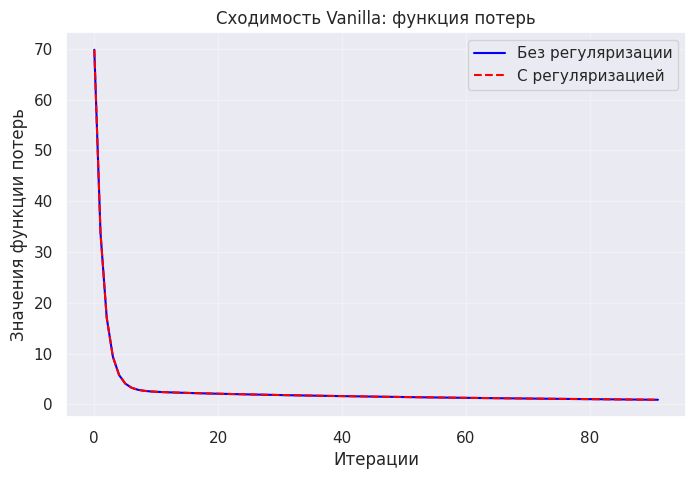

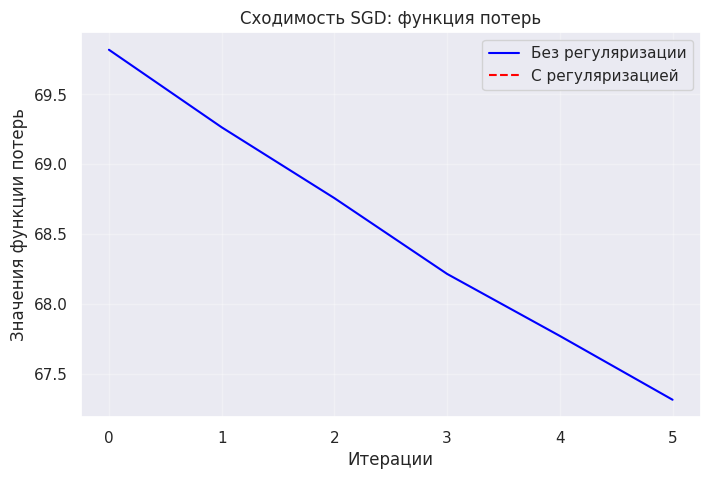

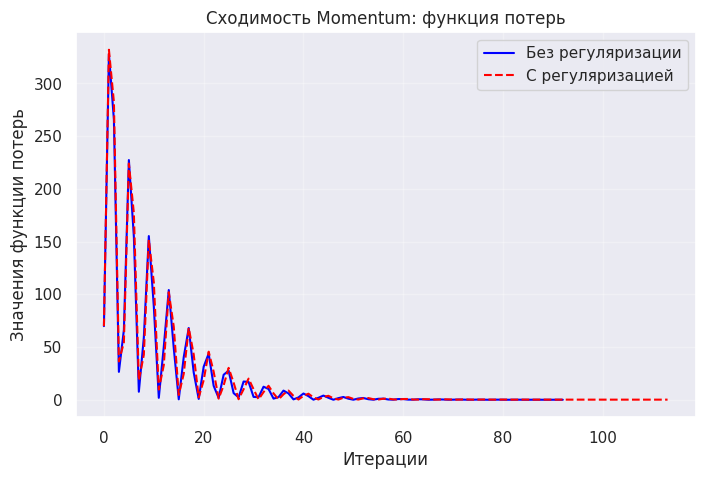

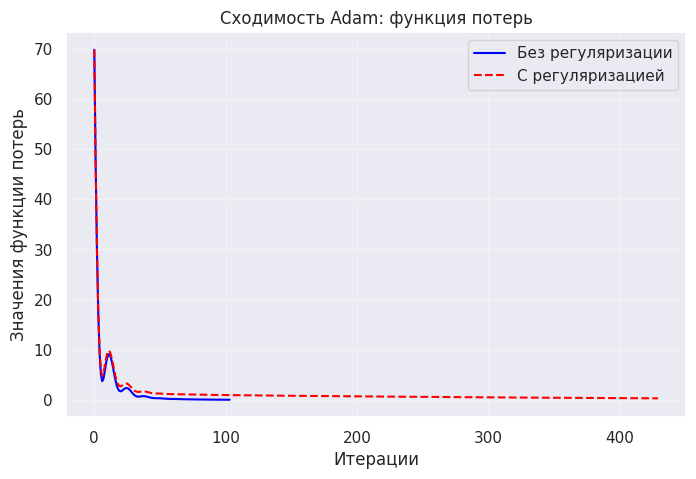

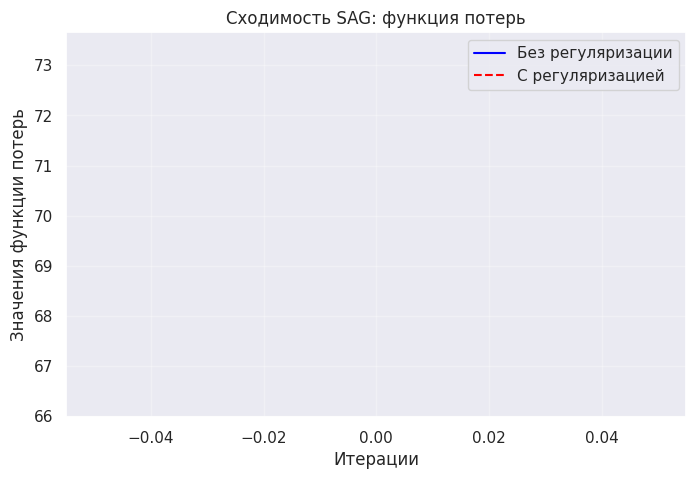

In [65]:
for name in methods.keys():
    no_reg = next(res["loss_history"] for res in final_results
                  if res["method"] == name and res["setting"] == "без регуляризации")
    reg = next(res["loss_history"] for res in final_results
               if res["method"] == name and res["setting"] == "с регуляризацией")

    plt.figure(figsize=(8, 5))
    plt.plot(no_reg, label="Без регуляризации", color='blue')
    plt.plot(reg, label="С регуляризацией", color='red', linestyle='--')
    plt.title(f"Сходимость {name}: функция потерь")
    plt.xlabel("Итерации")
    plt.ylabel("Значения функции потерь")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


**Вывод:**

*   Ухудшение качества на тренировочных данных

L2-регуляризация ограничивает веса, уменьшая способность модели подстраиваться под шум

*   Отсутствие улучшения на тестовых данных

Разница между train/test MSE практически не меняется

Переобучения не было изначально → регуляризация бесполезна

*   Замедление сходимости (особенно сильно пострадал Adam)

Регуляризация не нужна для данной задачи

## Задание 8. Альтернативные функции потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **LogCosh** и **HuberLoss**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

$$
L_{\text{Huber}}(y, a) = \frac{1}{n} \sum_{i=1}^{n}
\begin{cases}
   \frac{1}{2} (a_i - y_i)^2, & \text{если } |a_i - y_i| < \delta, \\
   \delta \cdot |a_i - y_i| - \frac{1}{2} \delta^2, & \text{если } |a_i - y_i| \geq \delta,
\end{cases}
$$

Самостоятельно продифференцируйте данные функции потерь чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

**Решение:**

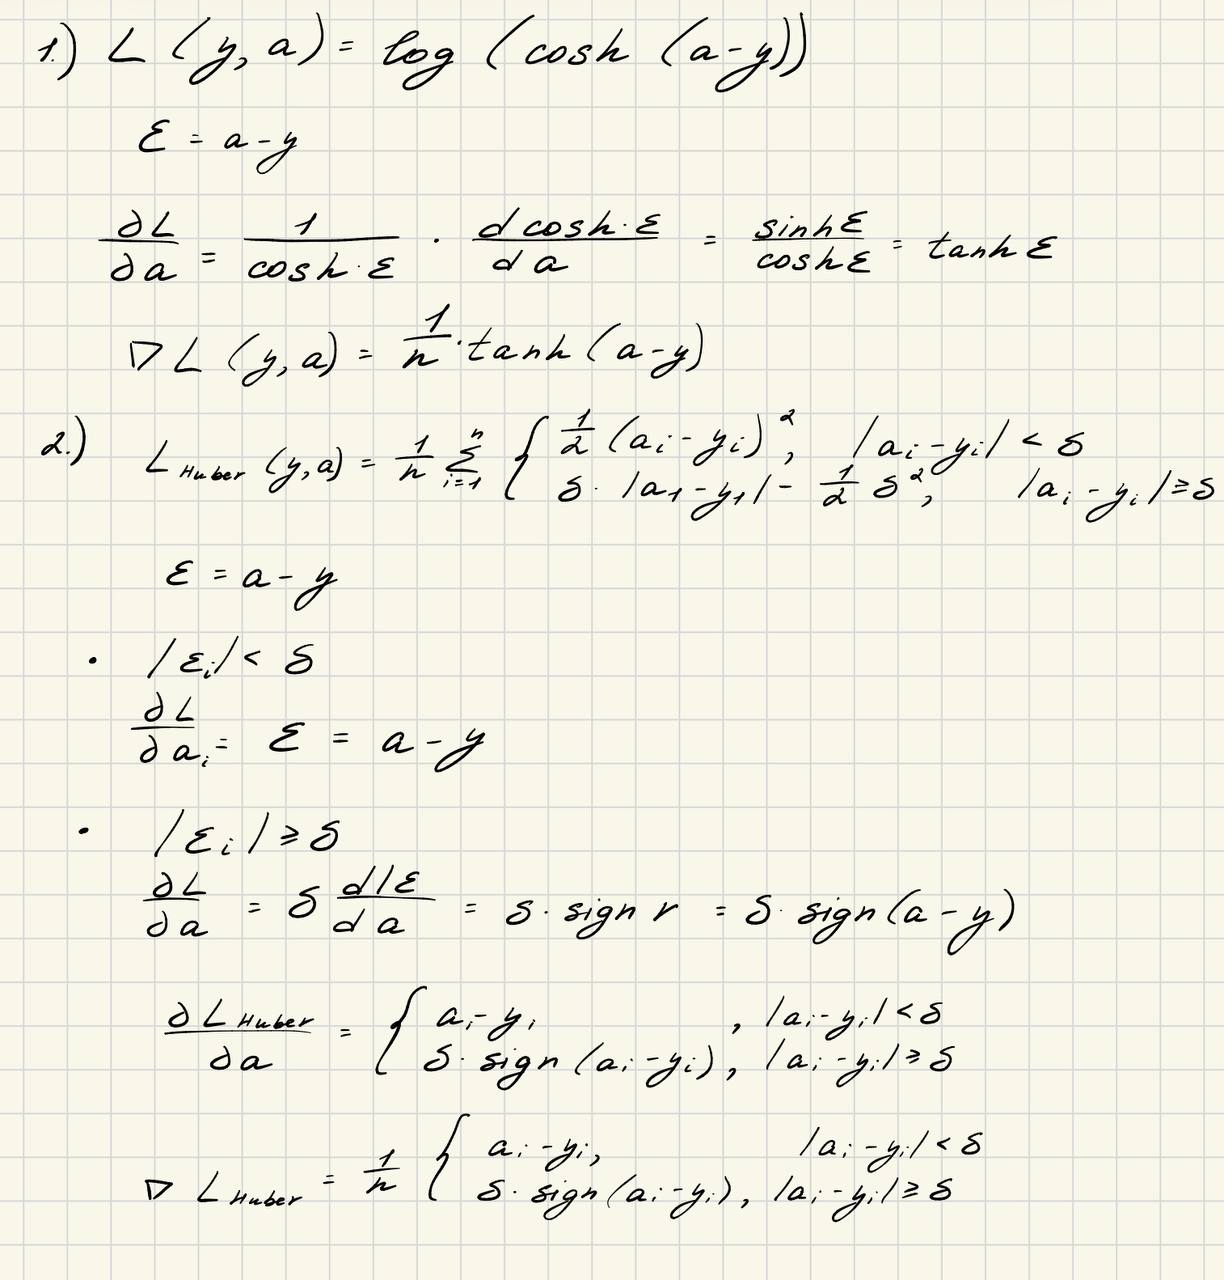

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class LinearRegression:
    def __init__(
        self,
        optimizer: BaseDescent,
        l2_coef: float = 0.0,
        tolerance: float = 1e-6,
        max_iter: int = 1000,
        loss_function: LossFunction = LossFunction.MSE
    ):
        ...
    
    def compute_gradients(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            # YOUR CODE FOR MSE
        if self.loss_function is LossFunction.MAE:
            # YOUR CODE FOR MAE
        ...
    
    def compute_loss(self, X: np.ndarray, y: np.ndarray) -> float:
        if self.loss_function is LossFunction.MSE:
            # YOUR CODE FOR MSE
        if self.loss_function is LossFunction.MAE:
            # YOUR CODE FOR MAE
        ...
...

```

In [ ]:
from joblib import Parallel, delayed
import numpy as np
from sklearn.metrics import r2_score
from linear_regression import LinearRegression, LossFunction

def evaluate_method(name, OptimizerClass, lr_grid, loss_function):
    best_lr, best_err = None, float("inf")

    for lr in lr_grid:
        model = LinearRegression(
            optimizer=OptimizerClass(lr_schedule=lambda: ConstantLR(lr)),
            l2_coef=0.0,
            tolerance=1e-4,
            max_iter=1000,
            loss_function=loss_function
        )
        model.fit(x_train, y_train)
        val_err = model.compute_loss(x_val, y_val)

        if val_err < best_err:
            best_err, best_lr = val_err, lr

    return name, best_lr, best_err

loss_functions = {
    'MSE': LossFunction.MSE,
    'MAE': LossFunction.MAE,
    'Huber': LossFunction.Huber,
    'LogCosh': LossFunction.LogCosh,}

lr_grid = np.logspace(-6, 0, 12)
results_all = {}

for loss_name, loss_fn in loss_functions.items():
    print(f'{loss_name}')

    results = Parallel(n_jobs=-1)(delayed(evaluate_method)(name, OptimizerClass, lr_grid, loss_fn)
        for name, OptimizerClass in methods.items())

    best_lrs = {n: lr for n, lr, _ in results}
    val_errors = {n: err for n, _, err in results}

    for n in methods:
        print(f"{n}: best lr={best_lrs[n]:.1e}, val {loss_name}={val_errors[n]:.4f}")

    final_results = []
    loss_histories = {}

    for name, OptimizerClass in methods.items():
        lr = best_lrs[name]
        model = LinearRegression(
            optimizer=OptimizerClass(lr_schedule=lambda: ConstantLR(lr)),
            l2_coef=0.0,
            tolerance=1e-4,
            max_iter=1000,
            loss_function=loss_fn)
        model.fit(x_train, y_train)

        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        final_results.append({
            "loss": loss_name,
            "method": name,
            "lr": lr,
            "train_loss": model.compute_loss(x_train, y_train),
            "test_loss": model.compute_loss(x_test, y_test),
            "r2": r2_score(y_test, y_test_pred),
            "iterations": len(model.loss_history)})

        loss_histories[(loss_name, name)] = model.loss_history

    results_all[loss_name] = {'final_results': final_results, 'loss_histories': loss_histories}

MSE
Vanilla: best lr=2.3e-02, val MSE=19.5902
SGD: best lr=2.3e-02, val MSE=25.9097
Momentum: best lr=2.3e-02, val MSE=16.3357
Adam: best lr=2.8e-01, val MSE=23.0490
SAG: best lr=1.0e+00, val MSE=69.8791
MAE


In [ ]:
pd.DataFrame(results_all["MSE"]["final_results"])

In [ ]:
pd.DataFrame(results_all["MAE"]["final_results"])

In [ ]:
pd.DataFrame(results_all["Huber"]["final_results"])

In [ ]:
pd.DataFrame(results_all["LogCosh"]["final_results"])

### Кулинарно-социализационный бонус. (0.5 балла)

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

**Пушка бомба запеканка**

Мешаем манную крупу 60г и молоко 60мл, даем настоятся. Отдельно взбиваем творог 800г, 90г сахара, 2 яйца, молоко с манной крупой, шепотку соли и ваниоин чайную ложку. Массу в форму для запекания и в духовку 200C на 20 минут. Достаем, мажем греческим йогуртом сверху и выкладываем фрукты/ягоды по вкусу, еще в духовку минут на 10 и все :)

Гость доволен, не отравлен, проблемы с жкт не наблюдаются
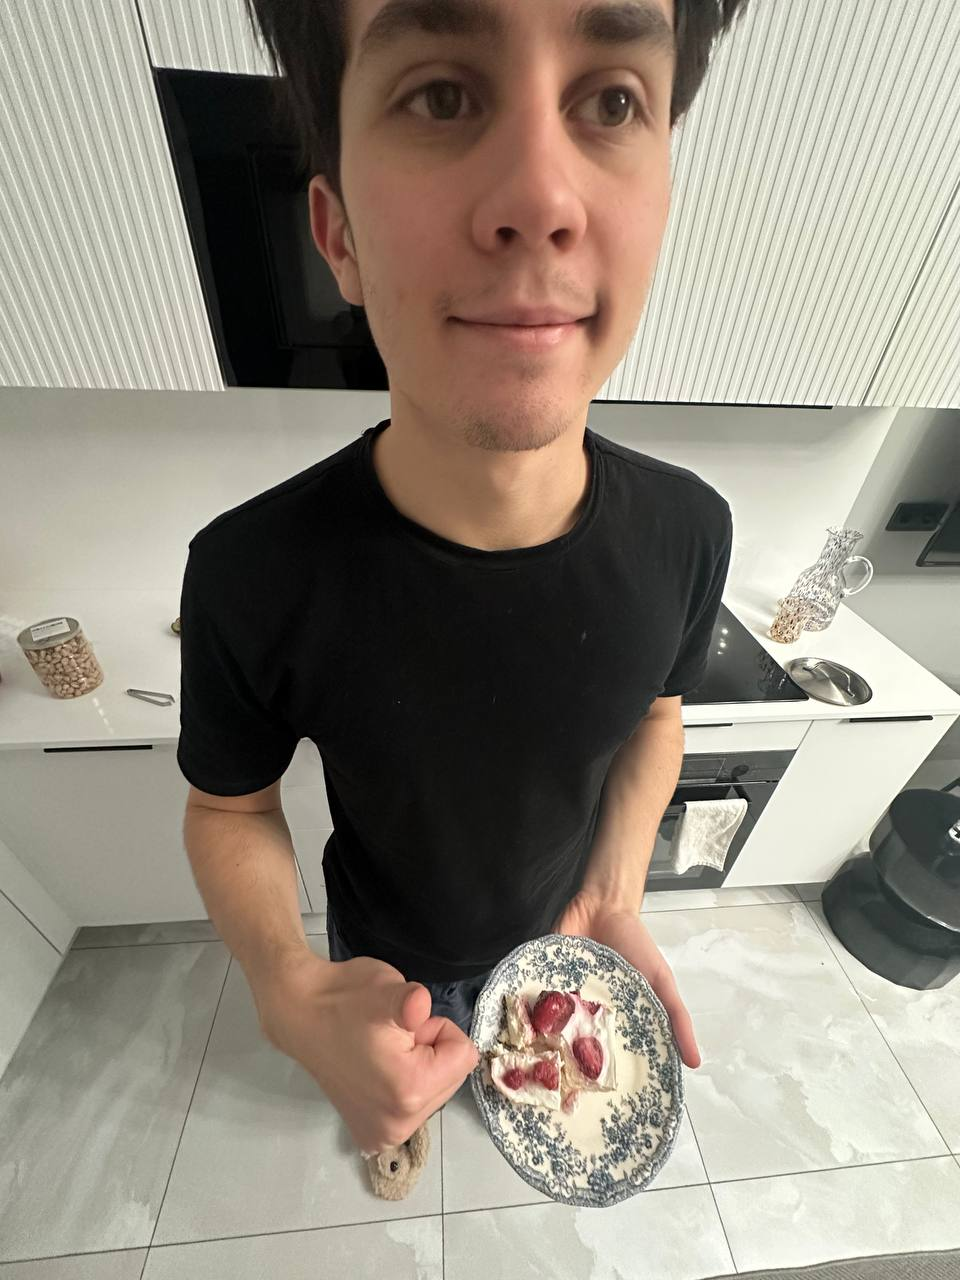

### Бонус Бонусный со звездочкой. Рефакторинг LinearRegression с соблюдением OCP (0.5 балла)

Этот бонус для тех, у кого нет друзей и кулинарных способностей.

Цель - провести рефакторинг класса `LinearRegression`, руководствуясь принципом **Open-Closed Principle** (OCP). Напомним его суть: программные сущности (классы, модули, функции) должны быть открыты для расширения, но закрыты для модификации. В нашем контексте это означает, что добавление новой функции потерь или нового типа регуляризации не должно требовать внесения изменений в уже существующий код модели `LinearRegression` или оптимизаторов.

Вам предоставляется свобода в выборе конкретной реализации (например, через `Strategy`/`Protocol`/интерфейсы), однако итоговое решение должно удовлетворять перечисленным ниже требованиям.

**Требования к реализации**

**1. Совместимость с существующим кодом (жёсткие требования):**

* Публичный API класса `LinearRegression` должен остаться неизменным, чтобы не нарушать работу автоматических тестов.
* Аргумент конструктора `loss_function: LossFunction = LossFunction.MSE` и сам `Enum` `LossFunction` сохраняются.
* Имена/сигнатуры ключевых методов (`predict`, `compute_gradients`, `compute_loss`, `fit`) и полей (`w`, `loss_history`) должны остаться прежними.
* Должно работать динамическое переключение лосса через enum: присваивание
`model.loss_function = LossFunction.Huber` меняет поведение `compute_loss/compute_gradients` без пересоздания модели.
* Код оптимизаторов из `descents.py` не меняется и по-прежнему вызывает только `self.model.compute_gradients(...)`.

**2. Расширяемость архитектуры:**

* Необходимо реализовать возможность инъекции кастомной стратегии для функции потерь (например, через новый необязательный аргумент в конструкторе `loss=...`). При передаче такой стратегии она должна использоваться вместо той, что выбирается через `Enum`.
* Добавьте поддержку L2-регуляризации. Её реализация и способ интеграции остаются на ваше усмотрение. Решение о штрафовании свободного члена (`bias`) примите самостоятельно и кратко опишите в ноутбуке.


Для зачёта задания предоставьте в конце ноутбука отдельный раздел, в котором содержатся:

* Короткое описание (2–5 предложений), как решение следует OCP.
* Две мини-демонстрации:
    1.  Создание модели с `loss_function=LogCosh`, вызов `compute_loss`, последующее присваивание `model.loss_function = LossFunction.MSE` и повторный вызов `compute_loss`, показывающий, что поведение модели изменилось.
    2.  Создание модели с передачей вашей кастомной стратегии в конструктор и демонстрация того, что она корректно работает со стандартным оптимизатором (например, `Adam`).
* Подтверждение, что базовый сценарий (только `enum`, без кастомных стратегий) проходит ваши локальные проверки.